In [1]:
import numpy as np 
from sklearn.datasets import make_blobs
from numpy.random import uniform, normal

In [2]:
#Copy of Generate Gaussian Parity from KDG.utils (Just for reference - Skip Cell)
def generate_gaussian_parity(
    n_samples,
    centers=None,
    class_label=None,
    cluster_std=0.25,
    center_box=(-1.0,1.0),
    angle_params=None,
    random_state=None,
):
    """
    Generate 2-dimensional Gaussian XOR distribution.
    (Classic XOR problem but each point is the
    center of a Gaussian blob distribution)
    Parameters
    ----------
    n_samples : int
        Total number of points divided among the four
        clusters with equal probability.
    centers : array of shape [n_centers,2], optional (default=None)
        The coordinates of the ceneter of total n_centers blobs.
    class_label : array of shape [n_centers], optional (default=None)
        class label for each blob.
    cluster_std : float, optional (default=1)
        The standard deviation of the blobs.
    center_box : tuple of float (min, max), default=(-1.0, 1.0)
        The bounding box for each cluster center when centers are generated at random.
    angle_params: float, optional (default=None)
        Number of radians to rotate the distribution by.
    random_state : int, RandomState instance, default=None
        Determines random number generation for dataset creation. Pass an int
        for reproducible output across multiple function calls.
    Returns
    -------
    X : array of shape [n_samples, 2]
        The generated samples.
    y : array of shape [n_samples]
        The integer labels for cluster membership of each sample.
    """

    if random_state != None:
        np.random.seed(random_state)

    if centers == None:
        centers = np.array([(-0.5, 0.5), (0.5, 0.5), (-0.5, -0.5), (0.5, -0.5)])

    if class_label == None:
        class_label = [0, 1, 1, 0]

    blob_num = len(class_label)

    # get the number of samples in each blob with equal probability
    samples_per_blob = np.random.multinomial(
        n_samples, 1 / blob_num * np.ones(blob_num)
    )

    X, y = make_blobs(
        n_samples=samples_per_blob,
        n_features=2,
        centers=centers,
        cluster_std=cluster_std,
        center_box=center_box
    )

    for blob in range(blob_num):
        y[np.where(y == blob)] = class_label[blob]

    if angle_params != None:
        R = _generate_2d_rotation(angle_params)
        X = X @ R

    return X, y.astype(int)

In [3]:
# Skip cell (Reference for how to use above function)
X, y = generate_gaussian_parity(20000, cluster_std=0.5)

In [4]:
    #Define number of samples & standard deviations of all clusters
    n_samples = 2000 #Update to 20000 once working 
    centers=None
    class_label=None
    cluster_std=0.5 #Passed as parameter
    center_box=(-1.0,1.0)
    angle_params=None
    random_state=None

In [5]:
    #Defining class labels & centers of the blobs
    if random_state != None:
        np.random.seed(random_state)

    if centers == None:
        centers = np.array([(-0.5, 0.5), (0.5, 0.5), (-0.5, -0.5), (0.5, -0.5)])

    if class_label == None:
        class_label = [0, 1, 1, 0]

    blob_num = len(class_label)

In [6]:
blob_num

4

In [7]:
    # get the number of samples in each blob with equal probability
    samples_per_blob = np.random.multinomial(
        n_samples, 1 / blob_num * np.ones(blob_num)
    )



In [8]:
samples_per_blob

array([453, 526, 503, 518])

In [9]:
    #Making 4 blobs, each with a given mean & standard deviation
    X, y = make_blobs(
        n_samples=samples_per_blob,
        n_features=2,
        centers=centers,
        cluster_std=cluster_std,
        center_box=center_box
    )

#'y' is assigned a value between 0 & 3 - belongs to one of 4 blobs 
# 'X' is a 2D set of blobs

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns


In [11]:
for blob in range(blob_num):
    temp = X[np.where(y==blob)]
    

Blob Number:  0
Centre/Mean: [-0.50774291  0.51016957]
Standard Dev:  [0.48124786 0.49347872]
Blob Number:  1
Centre/Mean: [0.54011545 0.49732814]
Standard Dev:  [0.49225206 0.49406688]
Blob Number:  2
Centre/Mean: [-0.5076852  -0.48282569]
Standard Dev:  [0.49140902 0.50039001]
Blob Number:  3
Centre/Mean: [ 0.51275973 -0.52031688]
Standard Dev:  [0.4847156  0.50629937]


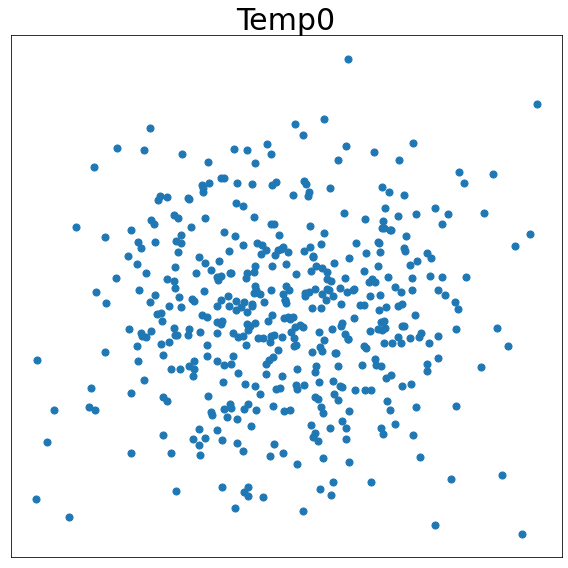

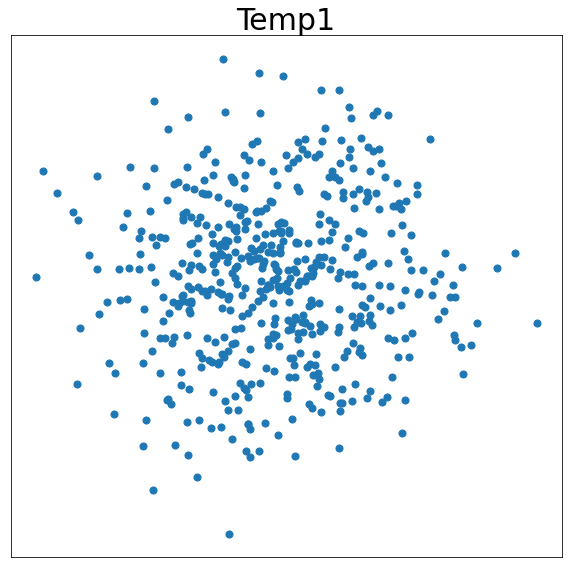

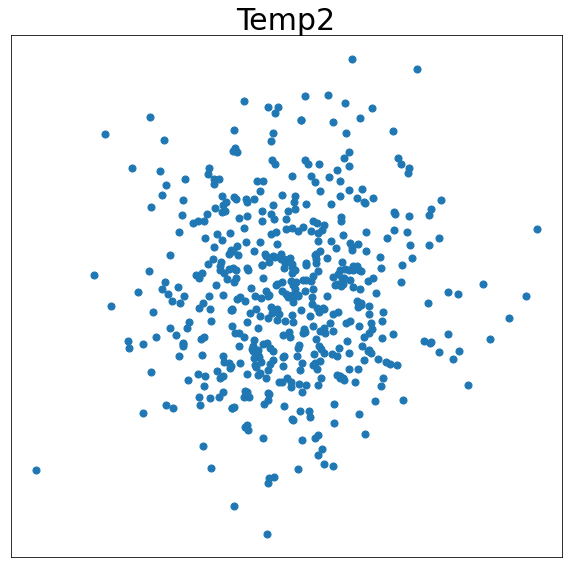

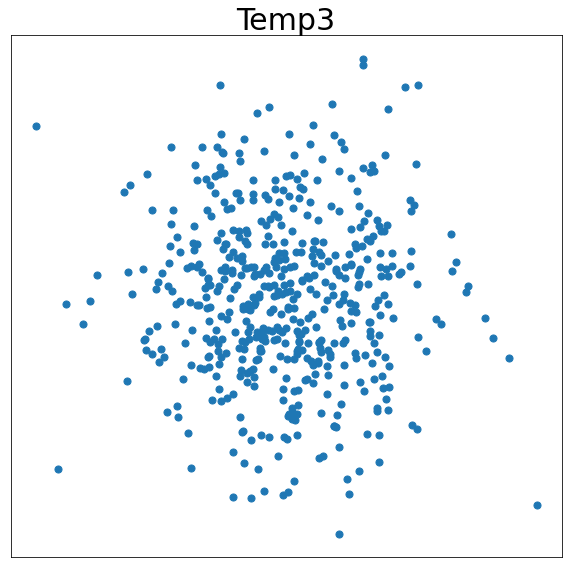

In [12]:
    # Plot all 4 blobs (separately)
    for blob in range(blob_num):
        temp = X[np.where(y==blob)]
        #Assign class 0 or 1 to each Gaussian blob 
        colors = sns.color_palette("Dark2", n_colors=2)
        fig, ax = plt.subplots(1, 1, figsize=(8, 8))
        ax.scatter(temp[:, 0], temp[:, 1], s=50)
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_title("Temp{}".format(blob), fontsize=30)
        plt.tight_layout()
        print("Blob Number: ", blob)
        print("Centre/Mean:", np.mean(temp, axis = 0))
        print("Standard Dev: ", np.std(temp, axis = 0))


In [13]:
#Contents of 'y', blob number moves from 0 to 3
y

array([2, 1, 1, ..., 0, 2, 1])

In [14]:
    #Should be skipped because angle_params = 1
    if angle_params != None:
        R = _generate_2d_rotation(angle_params)
        X = X @ R

In [15]:
#TODO: Move get_colors to 'functions'
def get_colors(colors, inds):
    c = [colors[i] for i in inds]
    print(c[0])
    print(inds[0])
    return c

(0.4588235294117647, 0.4392156862745098, 0.7019607843137254)
2


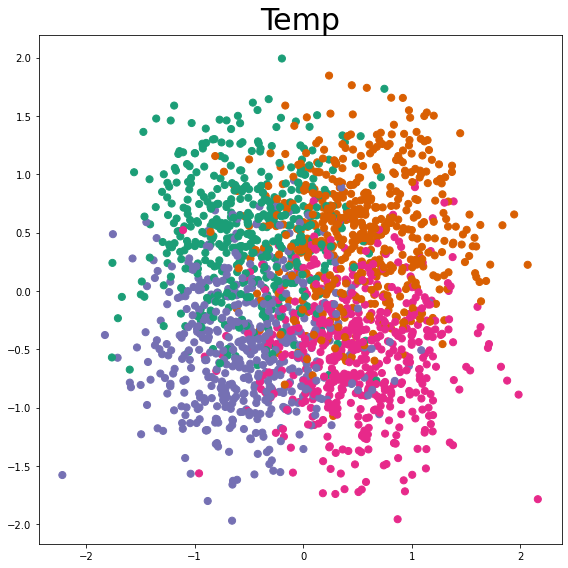

In [16]:
    #Plots all blobs on one graph with different colors
    #As visible, all gaussians are present in all quadrants 
    colors = sns.color_palette("Dark2", n_colors=4)
    fig, ax = plt.subplots(1, 1, figsize=(8, 8))
    ax.scatter(X[:, 0], X[:, 1], c=get_colors(colors, y), s=50)
    #ax.set_xticks([])
    #ax.set_yticks([])
    ax.set_title("Temp", fontsize=30)
    plt.tight_layout()

In [17]:
    #Assign Classes to blobs
    #for blob in range(blob_num):
    #    y[np.where(y == blob)] = class_label[blob]

In [18]:
#y

In [19]:
    #See which color belongs to which class
    #colors = sns.color_palette("Dark2", n_colors=2)
    #fig, ax = plt.subplots(1, 1, figsize=(8, 8))
    #ax.scatter(X[:, 0], X[:, 1], c=get_colors(colors, y), s=50)
    #ax.set_xticks([])
    #ax.set_yticks([])
    #ax.set_title("Temp", fontsize=30)
    #labels = ['0', '1'] 
    #plt.legend(labels)
    #plt.tight_layout()

In [20]:
np.full(len(centers), cluster_std)

array([0.5, 0.5, 0.5, 0.5])

In [21]:
#Considering X1 & X2 to be independent, both variables can be analyzed as univariate Gaussians separately
#After that, the probability = equal to product of individual probabilities 
G0 = X[np.where(y==0)]
G1 = X[np.where(y==1)]
G2 = X[np.where(y==2)]
G3 = X[np.where(y==3)]

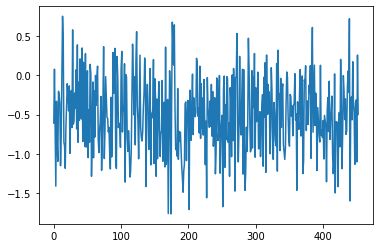

In [22]:
plt.plot(G0[:,0])

In [23]:
np.mean(G0[:,0])

-0.5077429062676945

In [24]:
np.std(G0[:,0])

0.48124785736759274

In [25]:
G0[0,0]

-0.6073849450117652

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

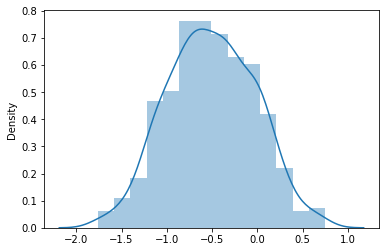

In [26]:
#Plot distribution of Gaussion 0
sns.distplot(G0[:,0])

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your c

[]

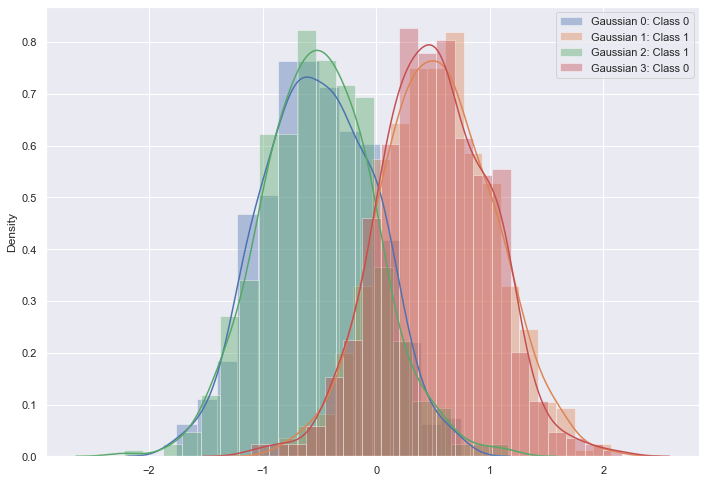

In [27]:
#Plot distribution of all Gaussians along X axis
#As visible, (G0 & G2) & (G1 & G3) are identically distributed - this is because the plot is along X axis
# Along Y-axis, the pairs would change (G0 & G1) & (G2 & G3) are identically distributed
sns.set(rc={'figure.figsize':(11.7,8.27)})
#plt.scatter(0, 0.4839, marker='o', s=100)
sns.distplot(G0[:,0], label = "Gaussian 0: Class 0")
sns.distplot(G1[:,0], label = "Gaussian 1: Class 1")
sns.distplot(G2[:,0], label = "Gaussian 2: Class 1")
sns.distplot(G3[:,0], label = "Gaussian 3: Class 0")
plt.legend()
plt.plot()

In [28]:
#Consider Intersection of all Gaussians with Gaussian 0
#Gaussian 0 & Gaussian 1 vary along feature x1
#Gaussian 0 & Gaussian 2 vary along feature x2
#Gaussian 0 & Gaussian 3 belong to the same class - therefore their variation does not induce any error 


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[]

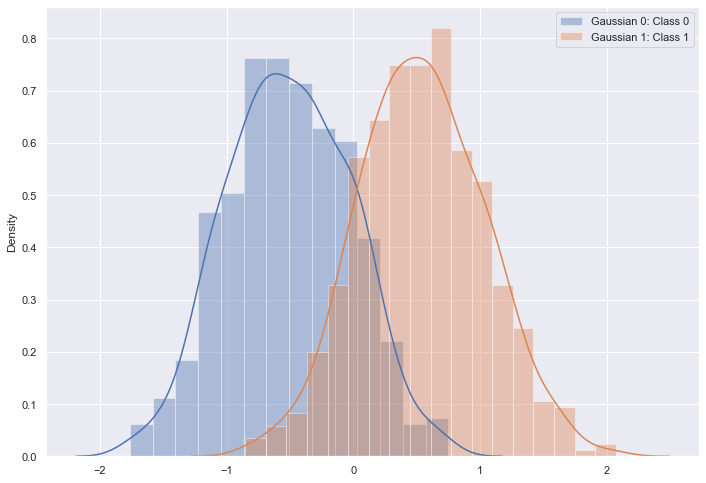

In [35]:
#Plotting variation between G0 & G1
#The intersection taken analytically is from the Gaussians of the original mean (centre) & std dev (assigned to blob)
# Error : Area under G1 from -1 to 0 + Area under G0 from  to 1
# Calculated using online calculators = 0.394
sns.distplot(G0[:,0], label = "Gaussian 0: Class 0")
sns.distplot(G1[:,0], label = "Gaussian 1: Class 1")
#plt.scatter(0, 0.4839, marker='o', s=100)
plt.legend()
plt.plot()

In [30]:
print("\t\t   Mean \t\t\tStd Dev\n")
print("Gaussian 0: ", np.mean(G0[:,0]), "\t", np.std(G0[:,0]),"\n")
print("Gaussian 1: ", np.mean(G1[:,0]), "\t", np.std(G1[:,0]),"\n")


		   Mean 			Std Dev

Gaussian 0:  -0.5077429062676945 	 0.48124785736759274 

Gaussian 1:  0.5401154472961012 	 0.49225205925372884 



/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[]

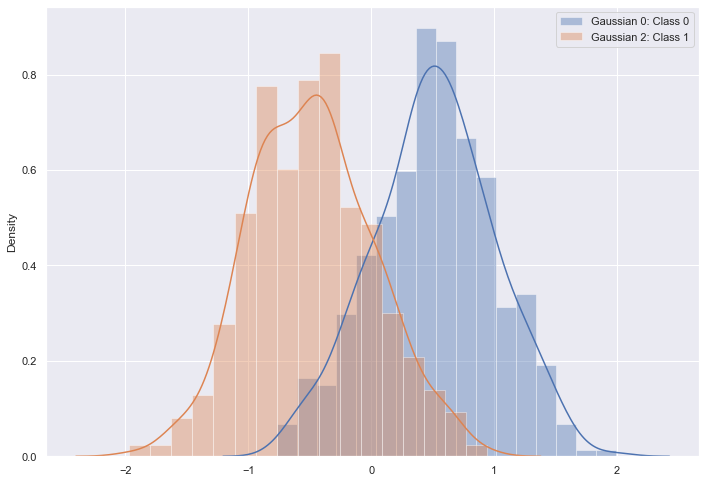

In [36]:
#Plotting variation between G0 & G2
#The intersection taken analytically is from the Gaussians of the original mean (centre) & std dev (assigned to blob)
# Error : Area under G0 from -1 to 0 + Area under G2 from  to 1
# Calculated using online calculators = 0.394
sns.distplot(G0[:,1], label = "Gaussian 0: Class 0")
sns.distplot(G2[:,1], label = "Gaussian 2: Class 1")
#plt.scatter(-0.025, 0.52, marker='o', s=100)
plt.legend()
plt.plot()

In [32]:
print("\t\t   Mean \t\t\tStd Dev\n")
print("Gaussian 0: ", np.mean(G0[:,1]), "\t", np.std(G0[:,1]),"\n")
print("Gaussian 2: ", np.mean(G2[:,1]), "\t", np.std(G2[:,1]),"\n")
#Estimated using these values, and then adjusted 

		   Mean 			Std Dev

Gaussian 0:  0.5101695730854143 	 0.49347872473314486 

Gaussian 2:  -0.48282568873624687 	 0.500390006816961 



In [33]:
#Both the distributions are independent : Multiply probabilities
# 0.394 * 0.394 = 0.155
#Similar variation for G3 with G1 & G2 respectively
            #UNSURE! Technically, once G1 & G2 are not treated as separate identities (because same class)
            #        then the total error will be error of EITHER G0 OR G3 with G1 & G2? 
            #        IF YES, KDF & KDN do not reach Bayes' error even after 20000 samples & 20 reps 
# Multiply probability by 2
#Total probability = 2 * 0.155 = 0.310 

In [34]:
#TODO: Estimate Bayes' error using RF & verify if it matches the analytical estimate